# Reading and writing data
Let's first do a bit of book keeping - figuring out how to read and write data.  The easiest way to do this is with some built in functions in numpy.

We'll start by importing our usual things:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's start by making a fake time and a fake angle array:

In [2]:
t = np.array([5, 6, 7, 8])
angle = np.array([36.0, 42.5, 44, 85])

And now we can simply save it with ```np.savetxt```:

In [3]:
np.savetxt('mytxtfile.txt', [t,angle], delimiter=',')

We can also take a gander at this file! We can do this with another "bash" command.

In windows the equivalent is: 

```gc mytxtfile.txt | select -first 10 # head```

or if ```gc``` won't work:

```Get-Content mytxtfile.txt | select -first 10 # head```

In [4]:
!head mytxtfile.txt

5.000000000000000000e+00,6.000000000000000000e+00,7.000000000000000000e+00,8.000000000000000000e+00
3.600000000000000000e+01,4.250000000000000000e+01,4.400000000000000000e+01,8.500000000000000000e+01


So we can see from the above that what we have is a bunch of ```float``` types where the first line is the time and the 2nd line is the angle.  We can then re-read these in:

In [5]:
data = np.genfromtxt('mytxtfile.txt', delimiter=',')
data

array([[ 5. ,  6. ,  7. ,  8. ],
       [36. , 42.5, 44. , 85. ]])

So now we have our data back in a data array.  There are a few ways to format this, we can do:

In [6]:
t_in = data[0,:]; angle_in = data[1,:]

t_in, angle_in

(array([5., 6., 7., 8.]), array([36. , 42.5, 44. , 85. ]))

We can also do this on read-in:

In [7]:
t_in = []; angle_in = []
t_in, angle_in = np.genfromtxt('mytxtfile.txt', delimiter=',')

t_in, angle_in

(array([5., 6., 7., 8.]), array([36. , 42.5, 44. , 85. ]))

Or we can actually name our array like so:

In [8]:
names = ('Time', 'Angle')
formats = ('f4', 'f4')

named_data = np.genfromtxt('mytxtfile.txt', 
                           delimiter=',', 
                           dtype={'names':names, 
                                  'formats':formats})

named_data


array([( 5.,  6. ), (36., 42.5)],
      dtype=[('Time', '<f4'), ('Angle', '<f4')])

We can then access our data like so:

In [9]:
named_data['Time']

array([ 5., 36.], dtype=float32)

However, note that our data is not properly formatted - this is because when we specify names and formats, it expects comments.  To use this feature, we should save like:

In [10]:
np.savetxt('mytxtfile.txt', np.array([t,angle]).T, delimiter=',')

!head mytxtfile.txt

5.000000000000000000e+00,3.600000000000000000e+01
6.000000000000000000e+00,4.250000000000000000e+01
7.000000000000000000e+00,4.400000000000000000e+01
8.000000000000000000e+00,8.500000000000000000e+01


What we did above is transform our list of arrays to an array of arrays, and took the transpose with ```.T``` - then things are output as columns.  So when we read in:

In [11]:
names = ('Time', 'Angle')
formats = ('f4', 'f4')

named_data = np.genfromtxt('mytxtfile.txt', 
                           delimiter=',', 
                           dtype={'names':names, 
                                  'formats':formats})

named_data

array([(5., 36. ), (6., 42.5), (7., 44. ), (8., 85. )],
      dtype=[('Time', '<f4'), ('Angle', '<f4')])

In [12]:
named_data['Time'], named_data['Angle']

(array([5., 6., 7., 8.], dtype=float32),
 array([36. , 42.5, 44. , 85. ], dtype=float32))

So this now works just fine!

# Reading in Kepler Data
Let's use what we've learned to read in some kepler datasets.  There are a bunch of parameters that we won't go through in detail, but there are more details in the header files:

In [13]:
!head -n 40 downloads/kepler101data.txt

# columns are:
# (1) Row ID from table
# (2) System Name
# (3) planet letter
# (4) Number of total planets in system
# (5) Orbital period in days
# (6) Upper error in Orbital Period (P_orb +/- (upper error)/(lower error)) in days
# (7) Lower error in orbital period in days
# (8) Semi-major axis  in AU
# (9) Error in semi major axis (a +/- ea)
# (10) Eccentricity
# (11) Upper error in eccentricity
# (12) Lower error in eccentricity
# (13) Inclination in degrees
# (14) Upper error in inclination
# (15) Lower error in inclination
# (16) Planet's mass in Jupiter mass (or M*sin(i) if given)
# (15) Upper error in planet's mass in jupiter masses
# (16) Lower error in planet's mass in jupieter masses
# (17) Mass type ('Mass' or 'Msini' - tells you what is the "mass" you actually measure)
# (18) Star's mass in solar masses
# (19) Error in star's mass
# (20) Star's radius in solar radii
# (21) Upper error in star's radius
# (22) Lower error in star's radius
# (23) Transit time in Julian days sin

Okay dokey, read in the file! Because there are so many parameters, let's use another library to do this for us.

Make sure you've downloaded the kepler 10 and 101 data sets!

In [14]:
from convert_kepler_data import read_kepler_data
kepler_data = read_kepler_data('/Users/jillnaiman1/Downloads/kepler101data.txt')
kepler_data

array([(779., b'Kepler-101 ', b'b', 2., 3.4876812, 7.0e-06, -7.0e-06, 0.0474, 0.009 , 0.086,  8.e-02, -5.9e-02, 85.82, 1.73, -1.53, 0.16,  2.e-02, -1.e-02, b' Mass', 1.17, 0.06, 1.56, 0.2, -0.2, 288.77994, 0.00041, -0.00041),
       (780., b'Kepler-101 ', b'c', 2., 6.02976  , 7.5e-05, -7.5e-05, 0.0684, 0.0014, 0.   , -1.e+02, -1.0e+02, 84.6 , 3.4 , -3.1 , 0.01, -1.e+02, -1.e+02, b' Mass', 1.17, 0.06, 1.56, 0.2, -0.2,  65.486  , 0.0088 , -0.0088 )],
      dtype=[('RowID', '<f4'), ('SysName', 'S12'), ('planetLetter', 'S2'), ('NumberOfPlanets', '<f4'), ('Porb', '<f4'), ('ePorbU', '<f4'), ('ePorbL', '<f4'), ('a', '<f4'), ('ea', '<f4'), ('ecc', '<f4'), ('eeccU', '<f4'), ('eeccL', '<f4'), ('Incl', '<f4'), ('eInclU', '<f4'), ('eInclL', '<f4'), ('pMass', '<f4'), ('epMassU', '<f4'), ('epMassL', '<f4'), ('pMassType', 'S8'), ('sMass', '<f4'), ('esMass', '<f4'), ('sRadius', '<f4'), ('esRadiusU', '<f4'), ('esRadiusL', '<f4'), ('tTime', '<f4'), ('etTimeU', '<f4'), ('etTimeL', '<f4')])

The above are all the different parameters for each planet, as listed by the "head" of the text file.

We can also look at individual parameters that might be interesting:

In [15]:
kepler_data['ecc']

array([0.086, 0.   ], dtype=float32)

So, the first planet has a small eccentricity and the second has zero, so a circular orbit.

Let's use a library to convert this to units that the Hermite solver can use.  Note: this uses a few assumptions to convert the Kepler data into initial conditions for our simulations.

Please check out the library if you want to see these assumptions if you are curious!

In [16]:
from convert_kepler_data import convert_kepler_data

In [17]:
star_mass, \
planet_masses, \
planet_initial_position, \
planet_initial_velocity, ecc = convert_kepler_data(kepler_data)

Let's see how these things look:

In [18]:
star_mass # Msun

1.17

In [19]:
planet_masses # in Jupiter masses

array([0.16, 0.01])

In [20]:
planet_initial_position # in AU

array([[-0.0433236 ,  0.        ,  0.        ],
       [ 0.06702392,  0.01365115,  0.        ]])

In [21]:
planet_initial_velocity # in km/s

array([[   0.        , -141.87933522,    0.        ],
       [ -24.65587511,  121.05448789,    0.        ]])

### Exercise
Use the Hermite solver to model this system & plot the orbits of the planets. How large/small does your timestep have to be to be to get a stable orbit?

Bonus: what about for the 5 planet system?

Once you have something you like, make a note of the time parameters you used.  We'll eventually save your favorite model to a file.

### Possible ans

Now import the hermite stuffs to solve this:

In [22]:
from hermite_library import do_hermite

In [23]:
# h is for hermite!
r_h, v_h, t_h, e_h = do_hermite(star_mass, 
                                planet_masses, 
                                planet_initial_position, 
                                planet_initial_velocity, 
                               tfinal=1e7, Nsteps=8800)

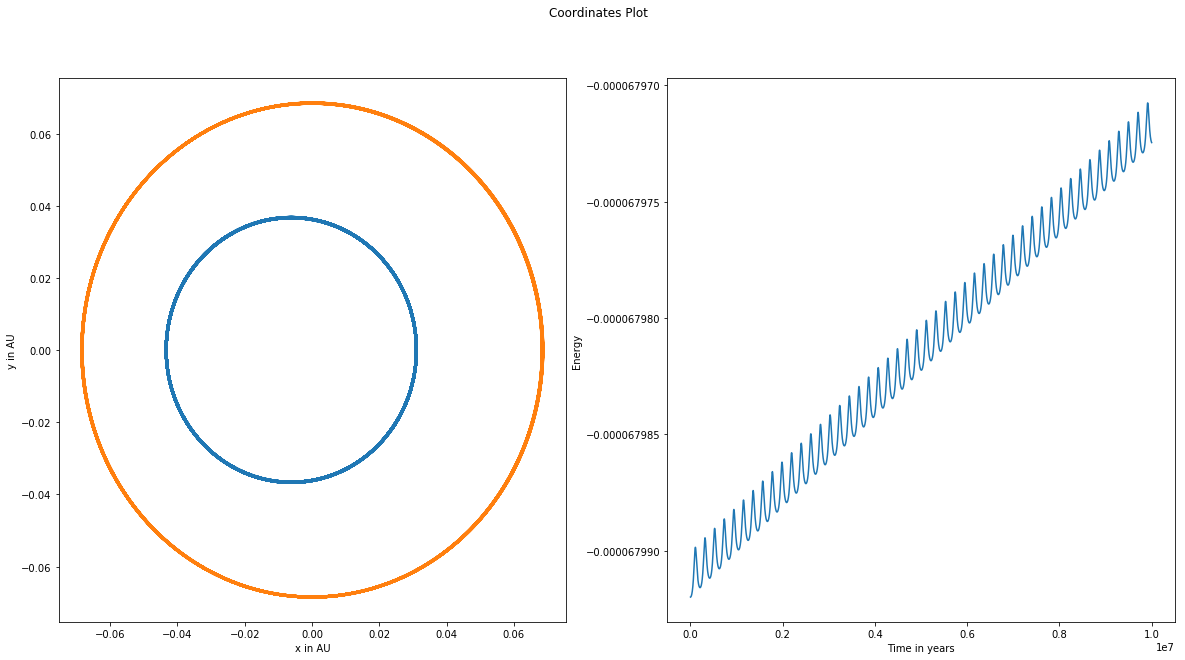

In [24]:
# let's plot!
fig, ax = plt.subplots(1, 2, figsize = (10*2, 10))
fig.suptitle('Coordinates Plot')

ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

for i in range(len(planet_masses)):
    ax[0].plot(r_h[i,0,:], r_h[i,1,:], lw=3)

ax[1].set_xlabel('Time in years')
ax[1].set_ylabel('Energy')
# re-norm energy
ax[1].plot(t_h, e_h)

plt.show()

## Saving data to a file, and reading it back in!
We'll also want to save our models and then be able to read them back in so you don't have to keep running models once you find one you like.

Per usual, we'll use a function from a library!

In [25]:
from hermite_library import save_hermite_solution_to_file

Now we'll simply call this and save our data!

In [26]:
# you can save it to your local directory, or another place
save_hermite_solution_to_file('myPlanetSystem.txt', 
                              t_h, e_h, r_h, v_h)

Let's quickly take a look at this:

In [27]:
!head myPlanetSystem.txt

0.000000000000000000e+00,-6.799198885028552943e-05,-4.331852307244812156e-02,-1.107107656726798300e-07,0.000000000000000000e+00,6.702900216666182742e-02,1.365104365687684444e-02,0.000000000000000000e+00,5.078102049476259360e-06,-1.107107656726798300e-07,0.000000000000000000e+00,1.201416740318806473e-06,-8.523511935193556210e-01,0.000000000000000000e+00,-1.481390926396770891e-01,7.274383576207541502e-01,0.000000000000000000e+00,1.201416740318806473e-06,1.047159119364062479e-04,0.000000000000000000e+00
1.136492783270826521e+03,-6.799198824681156647e-05,-4.330247022065980556e-02,-1.077698343988626843e-03,0.000000000000000000e+00,6.683539105535182823e-02,1.456950090025424180e-02,0.000000000000000000e+00,5.077589147273007199e-06,2.168645587296400320e-08,0.000000000000000000e+00,2.539002113577943157e-02,-8.520353387632382258e-01,0.000000000000000000e+00,-1.581064578856623548e-01,7.253369660846603617e-01,0.000000000000000000e+00,-2.012641502274654666e-06,1.046919656279508951e-04,0.00000000000

We want to be able to read this simulation data back in to use in plots, and visualizations next week.  So let's practice doing that with yet another function.

In [28]:
from hermite_library import read_hermite_solution_from_file

In [38]:
t_h2, e_h2, r_h2, v_h2 = read_hermite_solution_from_file('myPlanetSystem.txt')

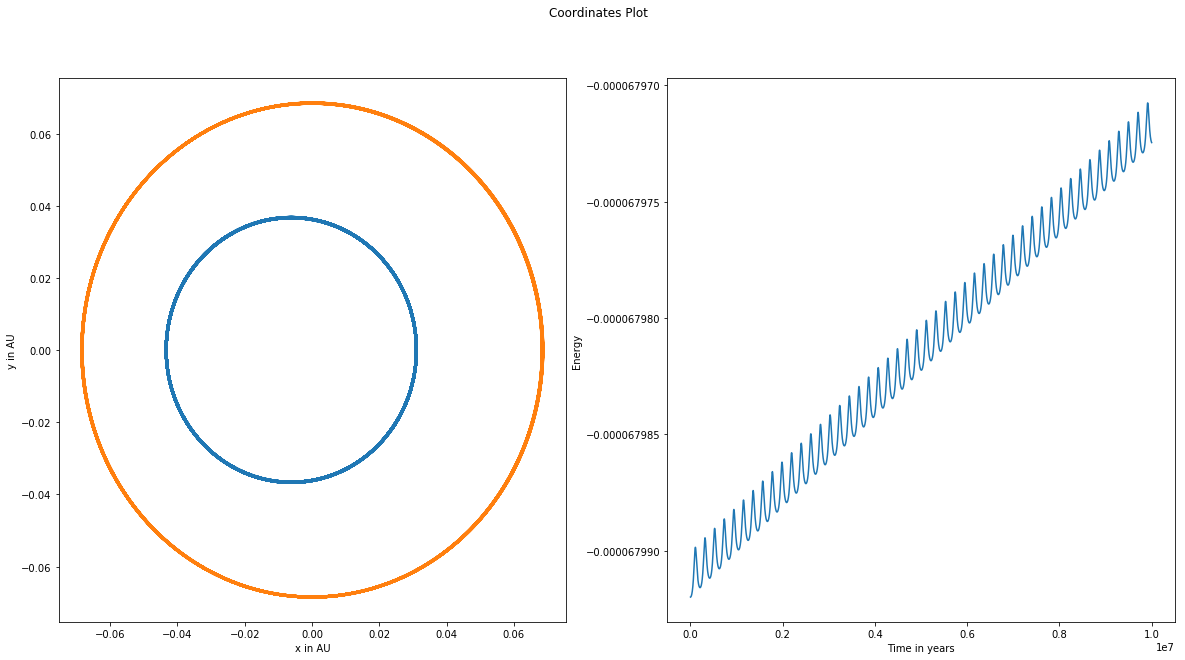

In [39]:
# let's plot!
fig, ax = plt.subplots(1, 2, figsize = (10*2, 10))
fig.suptitle('Coordinates Plot')

ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

for i in range(len(planet_masses)):
    ax[0].plot(r_h2[i,0,:], r_h2[i,1,:], lw=3)

ax[1].set_xlabel('Time in years')
ax[1].set_ylabel('Energy')
# re-norm energy
ax[1].plot(t_h2, e_h2)

plt.show()

So, we see we get the same thing back as before!  Whew!

### Exercise
Practice writing some models and reading back in.

### Bonus Exercise
Can you add planets to make this an unstable system?
